In [33]:
import numpy as np
import pandas as pd
import pymysql.cursors
import matplotlib 
import seaborn as sns
import datetime
sns.set(rc={'figure.figsize':(10,5)})


In [34]:



lis = []
lis2= []
# Connect to the database
conn = pymysql.connect(
    host='learningcomputerscience.com',port=3306, user='test_remote', password='test_remote!',database='9_8_BT', charset='utf8mb4',cursorclass=pymysql.cursors.DictCursor)

# Create a cursor object
cursor = conn.cursor()

# Execute a SELECT query
cursor.execute("SELECT * FROM recipt")
results = cursor.fetchall()
for result in results:
    # print(result)
    lis.append(result)
total = (pd.DataFrame.from_dict(lis)).set_index("ID")
# print(total)

cursor.execute("SELECT * FROM items")
results = cursor.fetchall()
for result in results:
    # print(result)
    lis2.append(result)
items = pd.DataFrame.from_dict(lis2)
items = items.set_index("name")
# print(items)

# Close the cursor and connection
cursor.close()
conn.close()

In [35]:
totalrev=0
for tr in total['revenue']:
    totalrev = totalrev +tr
print(totalrev)

8286.0


In [36]:
for index, row in total.iterrows():
    x = row['item']
    y = index
    if row['quantity_bought'] == 0:
        total.loc[index, 'quantity_bought'] = 1
    if row['revenue'] == 0:
        for index, row in items.iterrows():
            if index == x:
                c = row['price_sold']
                total.loc[y, 'revenue'] = c
total[total["revenue"] == 0].head(-4)

,date,item,quantity_bought,time,revenue
ID,,,,,


In [37]:
totalprofit = 0.00
t = total
t['profit'] = 0
profit = 0
for index, row in t.iterrows():
    y = index
    x = row['item']
    a = row['revenue']
    b = row['quantity_bought']
    for index, row in items.iterrows():
        if x == index:
            c = row['og_price']
            profit = (a - (b*c))
            t.loc[y, 'profit'] = profit
print(totalprofit)
t.head(5)



0.0


,date,item,quantity_bought,time,revenue,profit
ID,,,,,,
8,"Wednesday, January 25, 2023",Hortex Blackberry 300ml (Czarna Porzeczka),1.0,12 : 3,4.0,2.05
9,"Wednesday, January 25, 2023",Nestle Whole Grain with Chocolate 23g,5.0,12 : 5,20.0,13.05
10,"Wednesday, January 25, 2023",Oshee Vitamin Mineral Dragonfruit 555ml,1.0,12 : 15,6.0,3.35
11,"Wednesday, January 25, 2023",Lajkonik Pretzel Crackers,1.0,12 : 15,5.0,1.21
12,"Wednesday, January 25, 2023",Ginger shot 50g,2.0,12 : 16,24.0,6.82


In [38]:
def findtype(x):
    for index, row in items.iterrows():
        if x == index:
            c = row['type']
            return c
t['type'] = "null"
for index, row in t.iterrows():
    x = row['item']
    t.loc[index, 'type'] = findtype(x)

t[t['type'] == "null"].head()

,date,item,quantity_bought,time,revenue,profit,type
ID,,,,,,,


In [39]:
totalrev= 0 
totalprofit = 0
for index, rows in t.iterrows():
    a = t.at[index, 'revenue']
    b = t.at[index, 'profit']
    totalrev = totalrev + a
    totalprofit = totalprofit + b

print(totalprofit)
print(totalrev)


3986.219999999995
8551.0


In [40]:
t.head()

,date,item,quantity_bought,time,revenue,profit,type
ID,,,,,,,
8,"Wednesday, January 25, 2023",Hortex Blackberry 300ml (Czarna Porzeczka),1.0,12 : 3,4.0,2.05,drinks
9,"Wednesday, January 25, 2023",Nestle Whole Grain with Chocolate 23g,5.0,12 : 5,20.0,13.05,snacks
10,"Wednesday, January 25, 2023",Oshee Vitamin Mineral Dragonfruit 555ml,1.0,12 : 15,6.0,3.35,drinks
11,"Wednesday, January 25, 2023",Lajkonik Pretzel Crackers,1.0,12 : 15,5.0,1.21,snacks
12,"Wednesday, January 25, 2023",Ginger shot 50g,2.0,12 : 16,24.0,6.82,drinks


In [41]:
itemxprofit = items
itemxprofit['profit'] = 0
puprofit = 0

for index, row in itemxprofit.iterrows():
    x = index
    for index, row in t.iterrows():
        if x == row['item']:
            c = row['profit']
            puprofit += c
    itemxprofit.loc[x, 'profit'] = puprofit
    puprofit = 0
itemxprofit.head(10)

,id,price_sold,type,og_price,profit
name,,,,,
Still Water 500ml,2,2.5,drinks,1.05,40.60
Blue Ink Pen,4,1.0,utilities,0.58,2.52
Lajkonik Crackers,17,4.5,snacks,1.59,157.14
Lajkonik Junior Safari Crackers,18,6.0,snacks,3.59,57.35
Lajkonik Pretzel Crackers,24,5.0,snacks,3.79,1.21
Belvita Cookie,27,2.5,snacks,1.03,33.81
Scheweppes 850ml Bitter Lemon,35,8.0,drinks,4.91,55.62
Hortex Blackberry 300ml (Czarna Porzeczka),36,4.0,drinks,1.95,14.35
Hortex Multivitamin Juice 300ml,37,4.0,drinks,1.95,14.35


In [42]:

itemxprofit['bought'] = 0

for index, row in t.iterrows():
    x = row['item']
    c = row['quantity_bought']
    for index, row in itemxprofit.iterrows():
        if index == x:
            itemxprofit.at[index, 'bought'] += c

itemxprofit.head(70).sort_values(by = ['bought'], ascending=False)


,id,price_sold,type,og_price,profit,bought
name,,,,,,
Biscoff Biscuits,86,1.0,snacks,0.16,156.24,186
Oshee Vitamin Mineral Dragonfruit 555ml,46,6.0,drinks,2.65,495.80,148
POP N Chrup Snack Green Onion Green 35g,73,5.0,snacks,1.59,310.31,91
Oshee Vitamin Energy Zero Magnesium 250ml,45,5.0,drinks,2.53,165.69,77
Nestle Whole Grain with Chocolate 23g,81,4.0,snacks,1.39,177.48,68
...,...,...,...,...,...,...
Oxford A5 Notebook,56,40.0,utilities,29.63,0.00,0
ARO Highlighter x12,57,3.0,utilities,1.46,0.00,0
Nestle Fit Granola Bar Chocolate 23.5g,50,4.0,snacks\r\n,1.39,0.00,0


In [43]:
itemxprofit.rename(columns = {'ID':'id'}, inplace = True)

itemxprofit[itemxprofit['bought'] > 5].head(30)

,id,price_sold,type,og_price,profit,bought
name,,,,,,
Still Water 500ml,2,2.5,drinks,1.05,40.60,28
Blue Ink Pen,4,1.0,utilities,0.58,2.52,6
Lajkonik Crackers,17,4.5,snacks,1.59,157.14,54
Lajkonik Junior Safari Crackers,18,6.0,snacks,3.59,57.35,35
Belvita Cookie,27,2.5,snacks,1.03,33.81,23
Scheweppes 850ml Bitter Lemon,35,8.0,drinks,4.91,55.62,18
Hortex Blackberry 300ml (Czarna Porzeczka),36,4.0,drinks,1.95,14.35,7
Hortex Multivitamin Juice 300ml,37,4.0,drinks,1.95,14.35,7
Tymbark Orange Juice 300 ml,38,4.0,drinks,1.75,13.50,6


In [44]:
t.loc[t['item']=='Oshee Musli Bar Cranberry Pink 40g' ]

,date,item,quantity_bought,time,revenue,profit,type
ID,,,,,,,
226,"Monday, January 30, 2023",Oshee Musli Bar Cranberry Pink 40g,1.0,11 : 43,5.0,2.61,drinks
416,"Wednesday, February 1, 2023",Oshee Musli Bar Cranberry Pink 40g,1.0,13 : 18,5.0,2.61,drinks
470,"Wednesday, February 1, 2023",Oshee Musli Bar Cranberry Pink 40g,1.0,14 : 31,5.0,2.61,drinks
486,"Wednesday, February 1, 2023",Oshee Musli Bar Cranberry Pink 40g,1.0,15 : 0,5.0,2.61,drinks
848,"Friday, February 10, 2023",Oshee Musli Bar Cranberry Pink 40g,1.0,11 : 4,5.0,2.61,drinks


SNS Notebook / Presentation

/Users/23behmen_t/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


[Text(0.5, 1.0, 'Profit density over items')]

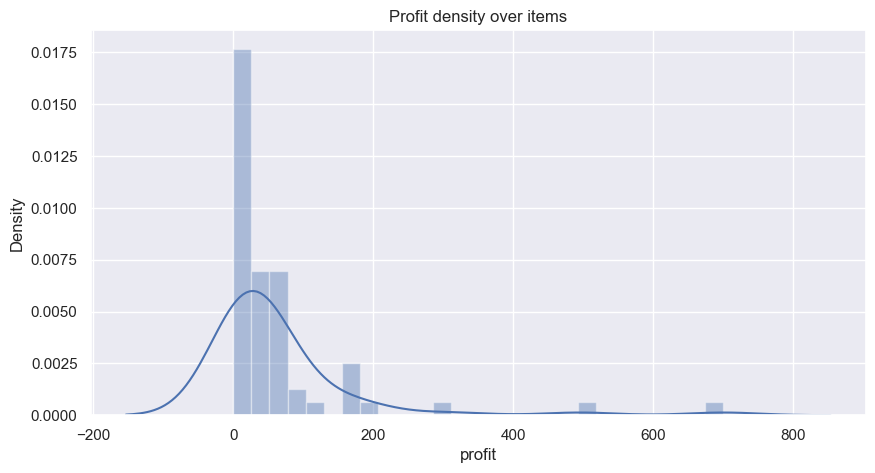

In [45]:
ax = sns.distplot(itemxprofit['profit'], kde=True)
ax.set(title='Profit density over items')


[Text(0.5, 1.0, 'Type and profit')]

) missing from current font.thon/3.7/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.thon/3.7/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


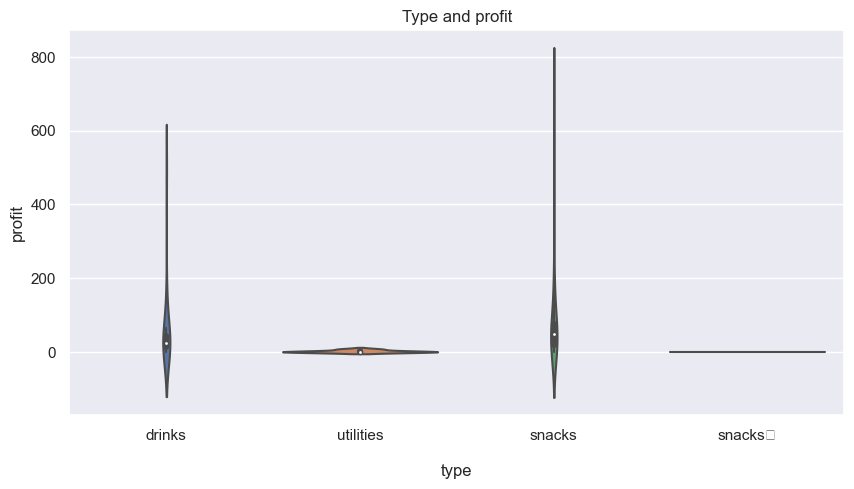

In [46]:
ax = sns.violinplot(x='type',y='profit', data=itemxprofit)
ax.set(title='Type and profit')

In [47]:
#average profit per unit on each day...
# import time
# from datetime import date
# dateplot = t
# date
# for index, row in dateplot.iterrows():
#     date = row['date']
#     date_object = datetime.datetime.strptime(date, '%A, %B %d, %Y')
#     dayofweek = date_object.strftime('%A')
#     dateplot.loc[index, 'date'] = dayofweek
    
# dateplot.groupby(['type','date']).mean()

[Text(0.5, 1.0, 'Date over days')]

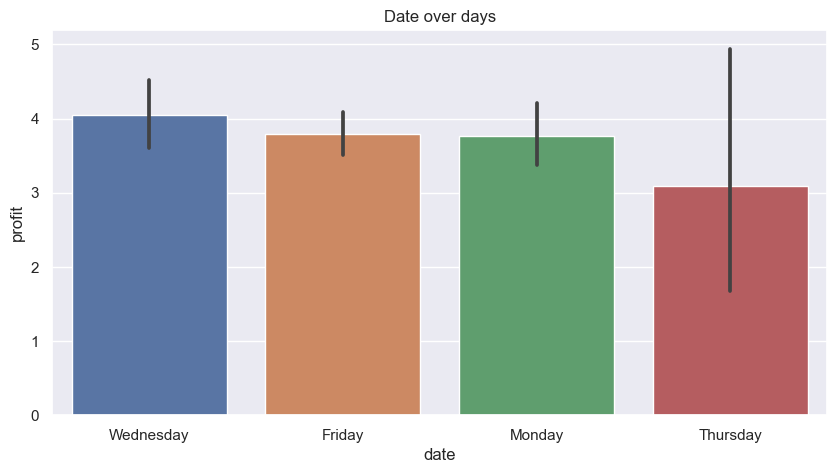

In [59]:
ax =sns.barplot(x='date',y='profit',data=dateplot)
ax.set(title='Date over days')


[Text(0.5, 1.0, 'Bought')]

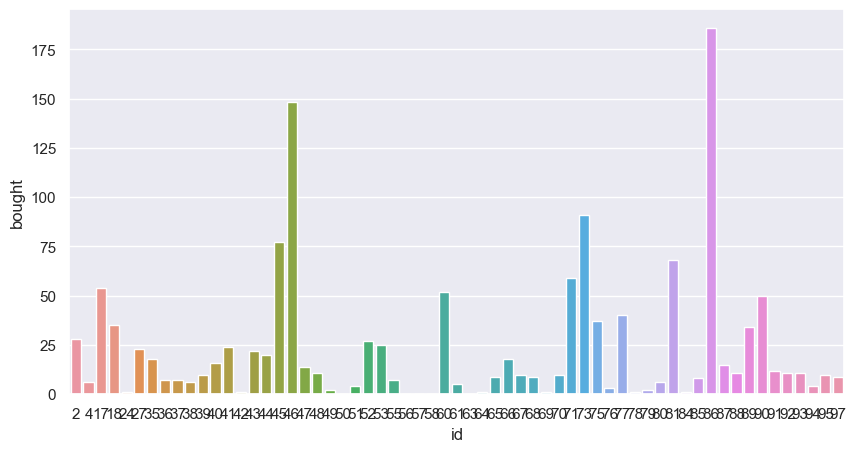

In [49]:
sns.barplot(x='id',y='bought',data=itemxprofit)
ax.set(title='Bought')


[Text(0.5, 1.0, 'Bought vs Profit')]

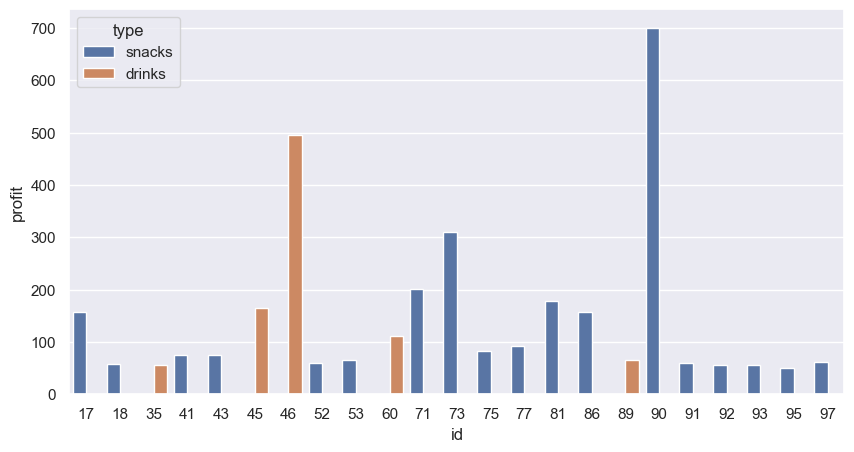

In [50]:
sns.barplot(x="id", y="profit", hue='type', data=itemxprofit[itemxprofit.profit.between(50, 40000)])
ax.set(title='Bought vs Profit')


) missing from current font.thon/3.7/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.thon/3.7/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


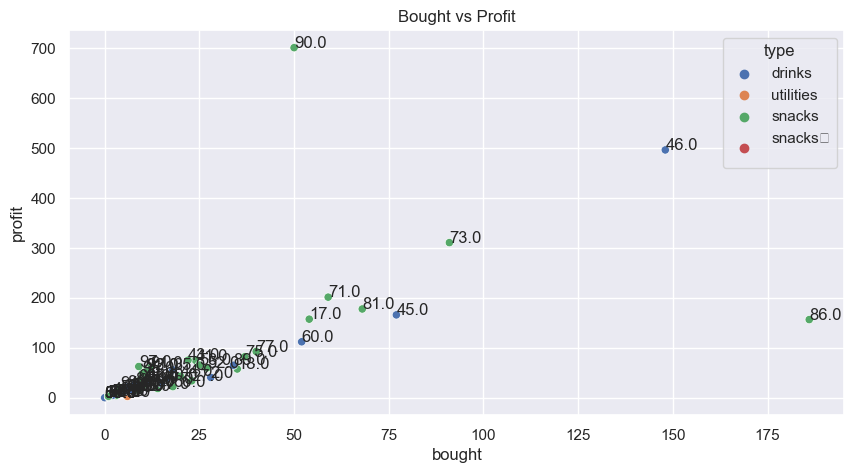

In [51]:
import matplotlib.pyplot as plt

# plot line graph
ax = sns.scatterplot(x='bought', y='profit',hue='type', data = itemxprofit)
ax.set(title='Bought vs Profit')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(itemxprofit.bought, itemxprofit.profit, itemxprofit.id, plt.gca())  


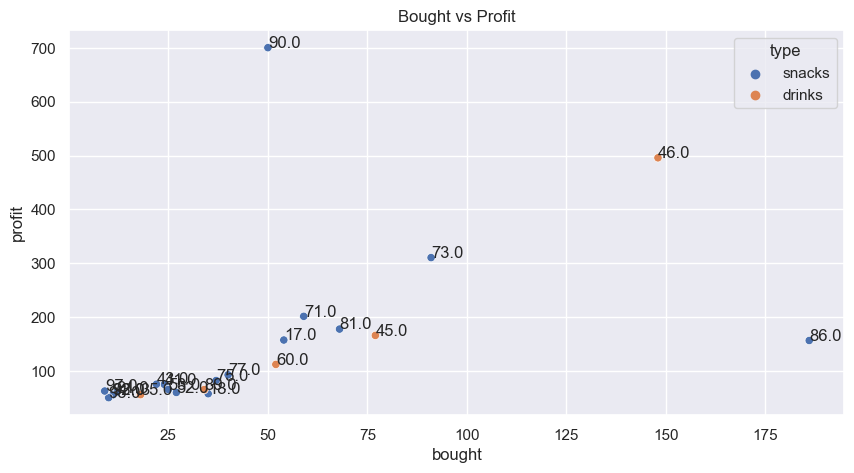

In [52]:
import matplotlib.pyplot as plt

# plot line graph
ax = sns.scatterplot(x='bought', y='profit',hue='type', data = itemxprofit[itemxprofit.profit.between(50, 40000)])
ax.set(title='Bought vs Profit')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(itemxprofit[itemxprofit.profit.between(50, 40000)].bought, itemxprofit[itemxprofit.profit.between(50, 40000)].profit, itemxprofit[itemxprofit.profit.between(50, 40000)].id, plt.gca())  


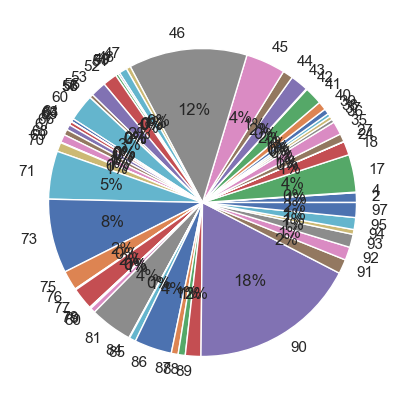

In [53]:

IDs = itemxprofit.id.values.tolist()
profita = itemxprofit.profit.values.tolist()


plt.pie(profita, labels = IDs, autopct='%.0f%%')
plt.show()

Training Machine Learning

In [54]:
itemxprofit.describe()

,id,price_sold,og_price,profit,bought
count,61.000000,61.00000,61.000000,61.000000,61.000000
mean,60.131148,6.57377,3.585082,65.347869,22.573770
std,23.418992,6.19330,4.607955,116.229171,33.744856
min,2.000000,1.00000,0.160000,0.000000,0.000000
25%,44.000000,4.00000,1.390000,11.000000,4.000000
50%,61.000000,5.00000,1.950000,29.810000,10.000000
75%,79.000000,6.00000,4.390000,62.370000,25.000000
max,97.000000,40.00000,29.630000,700.500000,186.000000


In [55]:
total.describe()

,quantity_bought,revenue,profit
count,1032.000000,1032.000000,1032.000000
mean,1.353682,8.285853,3.862616
std,1.158574,9.572009,3.724856
min,1.000000,0.000000,0.000000
25%,1.000000,4.500000,2.150000
50%,1.000000,5.000000,2.910000
75%,1.000000,8.000000,3.410000
max,24.000000,80.000000,29.100000


In [56]:
correlations_data = itemxprofit.corr()['price_sold'].sort_values()
correlations_data.head(10)

bought       -0.081429
id            0.225443
profit        0.364626
og_price      0.966864
price_sold    1.000000
Name: price_sold, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import GridSearchCV # for Hyper parameter tuning
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn import metrics

In [60]:
t['date']

ID
8       Wednesday, January 25, 2023
9       Wednesday, January 25, 2023
10      Wednesday, January 25, 2023
11      Wednesday, January 25, 2023
12      Wednesday, January 25, 2023
                   ...             
1096      Monday, February 13, 2023
1097      Monday, February 13, 2023
1098      Monday, February 13, 2023
1099      Monday, February 13, 2023
1100      Monday, February 13, 2023
Name: date, Length: 1032, dtype: object

In [61]:
import time
from datetime import date
dateplot = t
date
for index, row in dateplot.iterrows():
    date = row['date']
    date_object = datetime.datetime.strptime(date, '%A, %B %d, %Y')
    dayofweek = date_object.strftime('%A, %d')
    dateplot.loc[index, 'date'] = dayofweek
    
dateplot.groupby(['type','date']).sum()

quantity_bought    revenue     profit
type      date                                                
drinks    Friday, 03            1.384615   7.211538   3.676538
          Friday, 10            1.209302   7.174419   3.222209
          Friday, 27            4.666667  33.333333  10.726667
          Monday, 06            1.192308   5.769231   3.031154
          Monday, 13            1.179487   6.910256   2.999744
          Monday, 30            1.272727   7.690909   3.166182
          Thursday, 02          2.000000  12.000000   6.700000
          Wednesday, 01         1.090909   5.909091   2.894091
          Wednesday, 08         1.000000   4.600000   2.110000
          Wednesday, 25         1.108696   6.391304   2.838261
snacks    Friday, 03            1.410256   5.903846   3.339103
          Friday, 10            1.420561   6.443925   4.399720
          Friday, 27            1.666667   8.000000   4.838333
          Monday, 06            1.661017   4.906780   3.162034
          Monday, 13            1.078431  17.823529   8.126275
          Monday, 30            1.607477   6.196262   3.368318
          Thursday, 02          1.000000   5.500000   2.185000
          Wednesday, 01         1.431193   6.559633   3.317798
          Wednesday, 08         1.384615  19.669231   8.510000
          Wednesday, 25         1.280000   6.350000   3.071600
utilities Friday, 10            1.000000   1.000000   0.420000
          Wednesday, 08         1.166667   4.166667   1.636667